PPT: https://docs.google.com/presentation/d/1r8gnXml7w8ZxFZVX-C_xIkWReE4ApYBt2LmX0LCU4CQ/edit?usp=sharing

Report: https://docs.google.com/document/d/1sp-fSsxLttl8UP6vExR-VgL_Yaa-RsDzfB5VBd-MPfQ/edit?usp=sharing

## Harmonic Percussive Source Separation

Harmonic sounds are typically reflected by horizontal structures in a spectrogram representation of the
input signal, while percussive sounds form vertical structures.
<li> A harmonic sound is what we perceive as pitched sound, what makes us hear melodies and chords.
<li> A percussive sound is what we perceive as a clash, a knock, a clap, or a click.
<li> Percussive events can be regarded as outliers across time, while harmonic events can be regarded as outliers across frequency.

In [19]:
import numpy as np, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import seaborn, librosa, librosa.display, librosa.util

# configure plot size
plt.rcParams['figure.figsize'] = [8, 6]

## Masks

In [20]:
def soft_mask(X, F, p = 1):
    N = np.maximum(X, F)
    epsilon = 0.00001
    mask = (X/N)**p + epsilon
    mask /= mask + (F/N)**p + epsilon
    return mask

In [21]:
def binary_mask(X, F):
    mask = X > F
    return mask

In [22]:
def hpss(X):
  """
    Harmonic Percussive Source separation algorithm.
    Based on median filtering.
    
    Returns inverse STFT of the seprated signals
    which can be played directly
  """
  Y = librosa.stft(X)
  S, phase = librosa.core.magphase(Y)
  
  # applying filter horizontally
  Hf = np.empty_like(S)
  Hf[:] = scipy.ndimage.median_filter(S, size=(1,51))

  # applying filter vertically
  Pf = np.empty_like(S)
  Pf[:] = scipy.ndimage.median_filter(S, size=(31,1))

  Hmask = soft_mask(Hf, Pf, 2)
  Pmask = 1 - Hmask

  P = (Pf*Y) * phase
  H = (Hf*Y) * phase

  return (librosa.istft(H), librosa.istft(P))

In [23]:
def plot(X, title=""):
  X_db = librosa.amplitude_to_db(np.abs(X), ref=np.max)
  # plot the spectrogram
  fig, ax = plt.subplots()
  plt.title(title)
  img = librosa.display.specshow(X_db, x_axis='time', y_axis="linear", ax=ax)
  fig.colorbar(img, ax=ax, format="%+2.f dB",)

## Harmonic Audio

In [24]:
vh, vsr = librosa.load('./audio/violin.wav')

In [25]:
ipd.Audio(vh, rate=vsr)

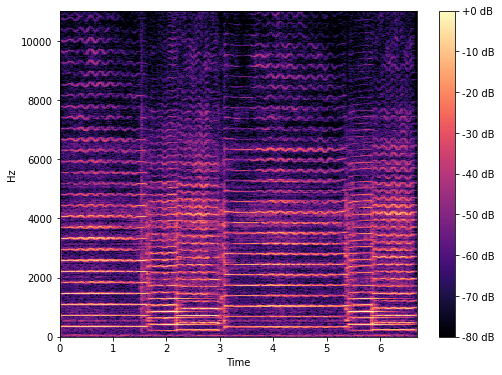

In [26]:
Vh = librosa.stft(vh)
plot(Vh)

In [27]:
xh, hsr = librosa.load('./audio/harmonic.wav')

In [28]:
ipd.Audio(xh, rate=hsr)

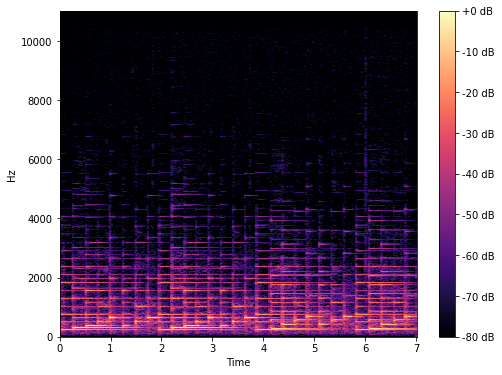

In [29]:
Xh = librosa.stft(xh)
plot(Xh)

## Percussive Audio

In [30]:
ctp, ctsr = librosa.load('./audio/castanets.wav')

In [31]:
ipd.Audio(ctp, rate=ctsr)

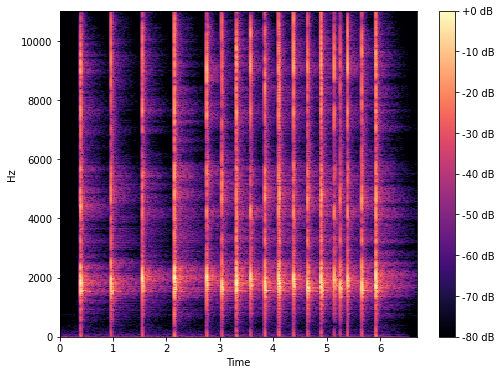

In [32]:
Ctp = librosa.stft(ctp)
plot(Ctp)

In [33]:
xp, psr = librosa.load('./audio/precussive.wav')

In [34]:
ipd.Audio(xp, rate=psr)

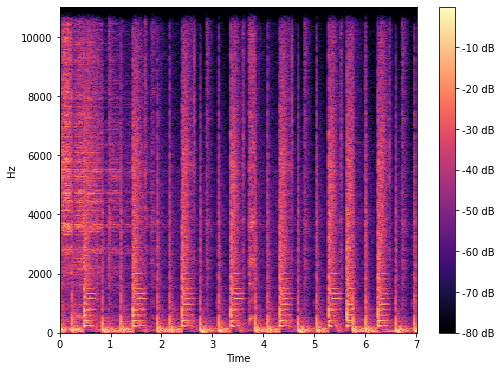

In [35]:
Xp = librosa.stft(xp)
plot(Xp)

## Combined Audio

In [36]:
cp, csr = librosa.load('./audio/mix.wav')

In [37]:
ipd.Audio(cp, rate=csr)

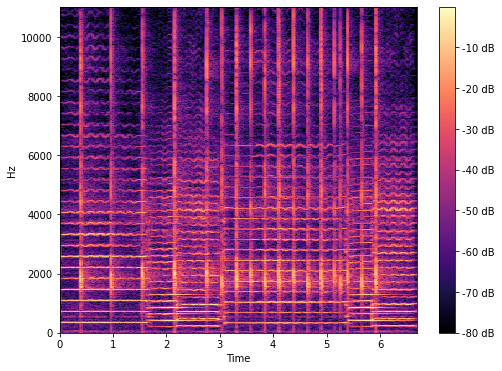

In [38]:
Xc = librosa.stft(cp)
plot(Xc)

In [39]:
# divide into magnitude and phase components
S, phase = librosa.core.magphase(Xc)

In [40]:
Hf = np.empty_like(S)
# create a filtered spectrogram using horizontal median filter
Hf[:] = scipy.ndimage.median_filter(S, size=(1,31))

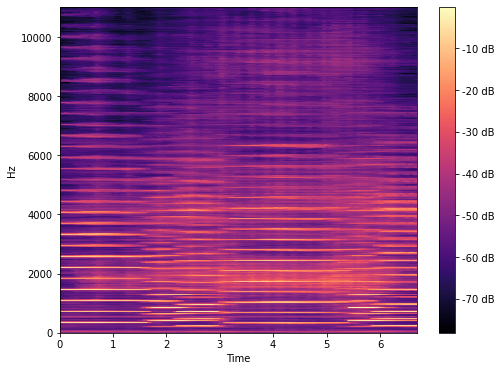

In [41]:
# spectogram of horizontal median filter
plot(Hf)

In [42]:
Pf = np.empty_like(S)
# create a filtered spectrogram using vertical median filter
Pf[:] = scipy.ndimage.median_filter(S, size=(31,1))

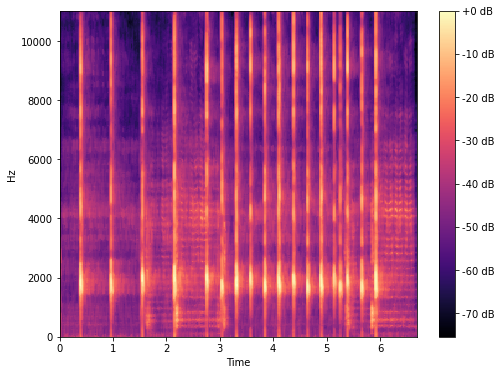

In [43]:
# spectogram of horizontal median filter
plot(Pf)

In [44]:
Hmask = soft_mask(Hf, Pf, 3)
Pmask = 1 - Hmask

In [45]:
P = (Pf*Pmask) * phase
p = librosa.istft(P)
ipd.Audio(p, rate=csr)

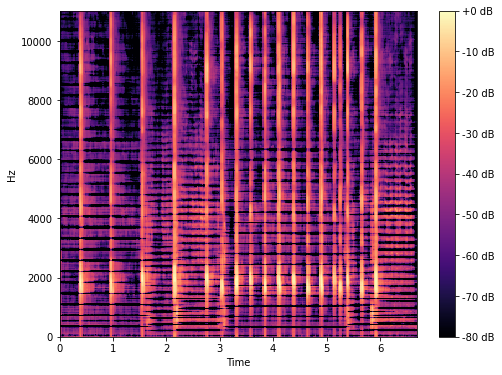

In [46]:
# plot the spectrogram
plot(P)

In [47]:
H = (Hf*Hmask) * phase
h = librosa.istft(H)
ipd.Audio(h, rate=csr)

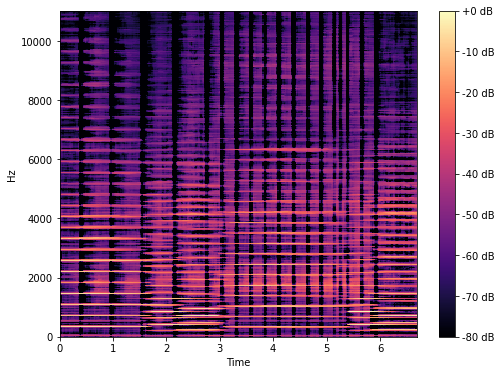

In [48]:
# plot the spectrogram
plot(H)

## More Examples

### Song: Stop Messing With Me

In [49]:
song, ssr = librosa.load('audio/stop_messing_with_me.wav')
ipd.Audio(song, rate=ssr)

In [50]:
h,p = hpss(song)

In [51]:
ipd.Audio(h, rate=ssr)

In [52]:
ipd.Audio(p, rate=ssr)

### Claps

In [53]:
claps, sr = librosa.load('audio/claps.wav')
ipd.Audio(claps, rate=sr)

In [54]:
h,p = hpss(claps)

In [55]:
ipd.Audio(h, rate=sr)

In [56]:
ipd.Audio(p, rate=sr)